**Universidade de São Paulo**  
**Instituto de Física**  
**Disciplina:** 4305512 - Aprendizado de máquina e inteligência artificial em física  
**Turma:** 2025201  
**Docentes:** Alexandre Alarcon do Passo Suaide, Tiago Fiorini da Silva, Luciana Varanda Rizzo  
**Discente:** Henrique Felix de Souza Machado  
**Nº USP:** 11554214  
**Link deste NB:** [https://github.com/hmfelix/ml-phy/blob/main/atividade3/atividade3.ipynb](https://github.com/hmfelix/ml-phy/blob/main/atividade3/atividade3.ipynb)

---

# Preparação dos dados

## Importação e checagens iniciais

Inicio a análise importando o conjunto de dados, que tenho salvo localmente como `dados.csv`.

In [170]:
import pandas as pd

dados = pd.read_csv('dados.csv', header=None)
dados.head()


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


Faço então uma checagem inicial:

In [171]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100001 non-null  float64
 1   1       100001 non-null  float64
 2   2       100001 non-null  float64
 3   3       100001 non-null  float64
 4   4       100001 non-null  float64
 5   5       100001 non-null  float64
 6   6       100001 non-null  float64
 7   7       100001 non-null  float64
 8   8       100001 non-null  float64
 9   9       100001 non-null  float64
 10  10      100001 non-null  float64
 11  11      100001 non-null  float64
 12  12      100001 non-null  float64
 13  13      100001 non-null  float64
 14  14      100001 non-null  float64
 15  15      100001 non-null  float64
 16  16      100001 non-null  float64
 17  17      100001 non-null  float64
 18  18      100001 non-null  float64
 19  19      100001 non-null  float64
 20  20      100001 non-null  float64
 21  21      10

In [172]:
dados.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
dtype: int64

Os dados parecem se comportar de acordo com o enunciado: cerca de 100 mil pontos de dados, com a primeira coluna indicando a classe (1 = sinal, 0 = fundo) e as demais colunas contendo 28 features, das quais devo usar somente as 21 *low-level*.

Não parece haver dados faltantes, de modo que não precisaremos implementar procedimentos tais como eliminação de campos não-preenchidos.

Checo agora como está a distribuição de dados entre as categorias que queremos prever:

In [173]:
n1 = int(dados.iloc[:,0].sum())
n0 = dados.shape[0] - n1
print(f'Número de dados da categoria "sinal" (1): {n1} ({round(100*n1/dados.shape[0],1)}%)')
print(f'Número de dados da categoria "fundo" (0): {n0} ({round(100*n0/dados.shape[0],1)}%)')

Número de dados da categoria "sinal" (1): 52834 (52.8%)
Número de dados da categoria "fundo" (0): 47167 (47.2%)


Nota-se que há uma distribuição razoavelmente equilibrada, o que nos parece garantir que não haverá distorções por amostras reduzidas de uma das categorias.

Agora checo a magnitude dos dados envolvidos:

In [174]:
dados.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,...,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000
mean,0.528335,0.990365,-0.003812,-0.001634,0.995055,-0.007618,0.987109,-0.003020,0.000430,0.998334,...,-0.007598,-0.004018,0.992711,1.032610,1.023150,1.050192,1.010196,0.973074,1.031874,0.959202
std,0.499199,0.561838,1.004837,1.006185,0.595359,1.006994,0.473118,1.008701,1.008428,1.027402,...,1.009195,1.007091,1.396785,0.652452,0.371609,0.164856,0.398273,0.523555,0.363393,0.313257
min,0.000000,0.274697,-2.434976,-1.742508,0.001283,-1.743944,0.139976,-2.968735,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.110875,0.303144,0.133012,0.295983,0.048125,0.303350,0.350939
25%,0.000000,0.590936,-0.741244,-0.868047,0.575644,-0.881453,0.676336,-0.688235,-0.867542,0.000000,...,-0.725017,-0.877028,0.000000,0.791306,0.846627,0.985775,0.767271,0.673790,0.819170,0.769968
50%,1.000000,0.854835,-0.002976,0.000971,0.890279,-0.011042,0.892163,-0.000025,-0.003822,1.086538,...,-0.010455,-0.009698,0.000000,0.895603,0.950707,0.989742,0.917305,0.874004,0.947038,0.871039
75%,1.000000,1.236776,0.735292,0.868220,1.290878,0.865865,1.167809,0.683233,0.871085,2.173076,...,0.710770,0.869386,3.101961,1.025923,1.083215,1.020761,1.141652,1.139814,1.139028,1.057478
max,1.000000,7.805887,2.433894,1.743236,7.998711,1.743229,7.064657,2.969674,1.741454,2.173076,...,2.498009,1.743372,3.101961,18.428827,10.038273,4.565248,7.442589,11.994177,7.318191,6.015647


Noto que, embora a ordem de magnitude seja parecida, será ideal ter algum tipo de escalonamento para inserir as features na rede. No entanto, como se sabe, isso deve ser feito depois de particionar o conjunto, o que faço a seguir.

## Particionamento

A primeira partição necessária é simplesmente a diferenciação entre o vetor de variáveis alvo, a ser previsto, e o conjunto de variáveis features, a ser alimentado à rede.

O primeiro é apenas a primeira coluna da matriz de dados. Já o segundo são as 21 colunas subsequentes. Por fim, deixo separado também a variável de interesse (m_wwbb), que consiste na última coluna.

In [175]:
target = dados.iloc[:,0].values
features = dados.iloc[:,1:22].values
m_wwbb = dados.iloc[:,-1].values

Agora procedo à divisão dos dados entre treino, validação e teste. Mesmo havendo uma distribuição razoável entre as categorias, como visto acima, esta divisão não é perfeita (aprox. 53/47), de modo que para ser conservador aplico uma estratificação. Além disso, como o enunciado pede para haver uma avaliação quanto aos dados de m_wwbb, incluo esta coluna no mesmo split

In [176]:
from sklearn.model_selection import train_test_split

# razoes
r_treino = 0.50
r_val = 0.2
r_teste = 0.3

# semente
estado_aleatorio = 21

# treino vs temporario (que sera validacao vs teste)
X_treino, X_temp, y_treino, y_temp, m_wwbb_treino, m_wwbb_temp = train_test_split(features, target, m_wwbb, test_size=(r_val + r_teste), stratify=target, random_state=estado_aleatorio)

# validacao vs teste
X_val, X_teste, y_val, y_teste, m_wwbb_val, m_wwbb_teste = train_test_split(X_temp, y_temp, m_wwbb_temp, test_size=r_teste / (r_teste + r_val), stratify=y_temp, random_state=estado_aleatorio)

# checagem da separacao
tamanhos = [len(X_treino), len(X_teste), len(X_val)]
print('Número de linhas no conjunto de...')
print()
print('  Treino:', tamanhos[0])
print('  Validacao:', tamanhos[1])
print('  Teste:', tamanhos[2])
print('  ------')
print('  Total:', sum(tamanhos))

Número de linhas no conjunto de...

  Treino: 50000
  Validacao: 30001
  Teste: 20000
  ------
  Total: 100001


## Escalonamento

Pela simplicidade na ordem de magnitude dos dados, escolho usar o StandardScaler para escaloná-los:

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_treino = scaler.fit_transform(X_treino)
X_val = scaler.transform(X_val)
X_teste = scaler.transform(X_teste)

Isso finaliza o pré-processamento dos dados.

# Modelo

## Arquitetura

De início, registro que tentei implementar arquiteturas idênticas àquelas propostas pelo paper, mas não obtive resultados tão satisfatórios. O enunciado sugere que uma MLP conseguiria dar conta do problema com razoável eficácia. Assim, optei por tentar arquiteturas mais simples e cheguei na arquitetura abaixo como a de melhor performance.

Depois de alguns testes iniciais, consolidei uma arquitetura de quatro camadas densas que começam grande (512 neurônios), mas vão se refinando pela fração 1/2 até chegar a 64 neurônios. A função de ativação `'tanh'`, embora não seja a mais rápida, mostrou ganhos não desprezíveis em relação às demais funções testadas.

Cada uma dessas camadas é intercalada por (i) uma renormalização (*batch normalization*), que introduz uma primeira regularização ao diminuir a mudança covariada na distribuição das ativações, e (ii) um *dropout*, que introduz uma nova regularização zerando um percentual das ativações e com isso impedindo a co-dependência entre neurônios específicos.

Essas duas regularizações melhoraram a rede, mas ainda observei *overfitting*. Por isso, adicionei uma regularização L2 em cada camada, que, conforme vimos nas aulas dos algoritmos anteriores, penaliza pesos grandes ou sobre-especializados e força uma melhor distribuição.

Por fim, adicionei a camada de saída com uma unidade e ativação sigmoide (classificação binária).

Uso o otimizador padrão ADAM e a função de perda `binary_crossentropy`. Visto se tratar de um problema de classificação, tomo como principal referência o monitoramento das métricas de acurácia e de AUC, mas estudo também as demais métricas tradicionais.

In [178]:
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.metrics import AUC, Precision, Recall

# inicializacao
modelo = Sequential()

# camada 1
modelo.add(Dense(512, activation='tanh', kernel_regularizer=l2(1e-4), input_shape=(X_treino.shape[1],)))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.3))

# camada 2
modelo.add(Dense(256, activation='tanh', kernel_regularizer=l2(1e-4)))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.3))

# camada 3
modelo.add(Dense(128, activation='tanh', kernel_regularizer=l2(1e-4)))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.3))

# camada 4
modelo.add(Dense(64, activation='tanh', kernel_regularizer=l2(1e-4)))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.3))

# saida binaria
modelo.add(Dense(1, activation='sigmoid'))


# compilacao
modelo.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')]
)

c:\Users\henri\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Abaixo checo apenas se o modelo foi corretamente inicializado e suas métricas de complexidade:

In [179]:
modelo.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 512)            │        11,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,649 (733.00 KB)

 Trainable params: 185,729 (725.50 KB)

 Non-trainable params: 1,920 (7.50 KB)

## Treinamento

Depois de alguns testes, notei que um número de épocas de aproximadamente 1000 já é mais que suficiente para gerar bons resultados. Usando um critério de parada antecipada para evitar *overfitting*, o modelo parou várias épocas antes.

In [180]:
parada = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

Com essa configuração, treino o modelo:

In [181]:
historico = modelo.fit(
    X_treino, y_treino,
    validation_data=(X_val, y_val),
    epochs=1200,
    batch_size=256,
    callbacks=[parada],
    verbose=1
)

Epoch 1/1200
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5278 - auc: 0.5335 - loss: 0.8299 - precision: 0.5507 - recall: 0.5777 - val_accuracy: 0.5584 - val_auc: 0.5820 - val_loss: 0.7466 - val_precision: 0.5693 - val_recall: 0.6747
Epoch 2/1200
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5426 - auc: 0.5523 - loss: 0.7695 - precision: 0.5614 - recall: 0.6140 - val_accuracy: 0.5691 - val_auc: 0.5973 - val_loss: 0.7390 - val_precision: 0.5766 - val_recall: 0.6942
Epoch 3/1200
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5530 - auc: 0.5705 - loss: 0.7491 - precision: 0.5678 - recall: 0.6441 - val_accuracy: 0.5775 - val_auc: 0.6052 - val_loss: 0.7343 - val_precision: 0.5883 - val_recall: 0.6678
Epoch 4/1200
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5656 - auc: 0.5911 - loss: 0.7377 - precision: 0.5782 - recall: 0.6574 - val_accuracy: 0.5796 - val_auc: 0.6117 - val_loss: 0.7288 - val_precision: 0.5865 - val_recall: 0.6921
Epoch 5/1200
196/196 

A seguir ploto os gráficos para avaliar os ganhos de performance ao longo do treinamento:

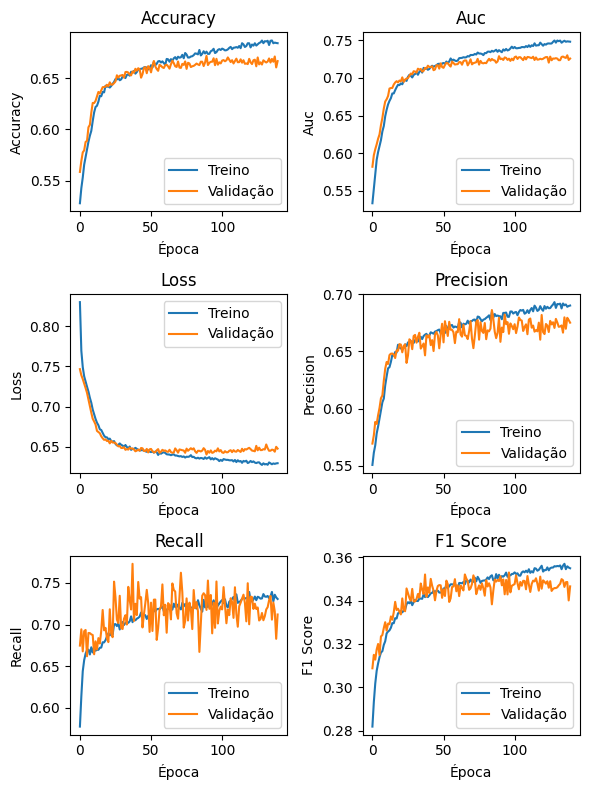

In [182]:
import matplotlib.pyplot as plt
import numpy as np

history_dict = historico.history

plt.figure(figsize=(6, 8))

# plots das metricas registradas pelo keras
for i, metrica in enumerate(history_dict):
    if i > 4:
        break
    plt.subplot(3, 2, i + 1)
    plt.plot(history_dict[metrica], label='Treino')
    plt.plot(history_dict['val_' + metrica], label='Validação')
    plt.title(metrica.capitalize())
    plt.xlabel('Época')
    plt.ylabel(metrica.capitalize())
    plt.legend()

# calculo do F1 score
pr = np.array(history_dict['precision'])
re = np.array(history_dict['recall'])
v_pr = np.array(history_dict['val_precision'])
v_re = np.array(history_dict['val_recall'])
f1 = (pr * re) / (pr + re)
v_f1 = (v_pr * v_re) / (v_pr + v_re)

# plot do F1 score
plt.subplot(3, 2, 6)
plt.plot(f1, label='Treino')
plt.plot(v_f1, label='Validação')
plt.title('F1 Score')
plt.xlabel('Época')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout();

Noto que o modelo apresentou inicialmente épocas com ganhos significativos de performance tanto nos dados de treino quando nos de validação. A partir de aproximadamente 50 épocas, o modelo passa a apresentar ganhos mais no conjunto de treino, com ganhos marginais ou nulos no conjunto de validação, eventualmente ativando nosso critério de parada para evitar *overtraining*.

## Predição

Abaixo aplico o modelo aos dados de teste e aplico o corte mais óbvio à saída do modelo (probabilidade > 1/2) para determinar qual classificação foi favorecida.

In [183]:
y_pred_prob = modelo.predict(X_teste)
y_pred = (y_pred_prob > 0.5).astype(int)

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


A partir disso, é possível avaliar o desempenho do modelo. Primeiramente, olho para a matriz de confusão:

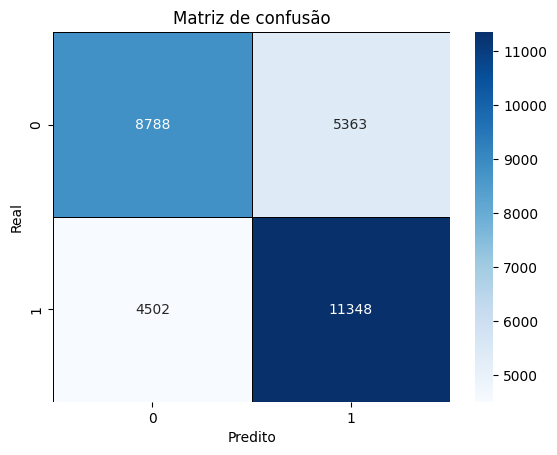

In [184]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

MC = confusion_matrix(y_teste, y_pred)

sns.heatmap(MC, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=0.5, linecolor='black')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de confusão');

A matriz nos mostra que o modelo de fato foi capaz de discernir o sinal do ruído, embora essa tarefa tenha sido realizada com um grau não despezível de erro. Em termos de acurácia por categoria, tivemos:

In [185]:
pr0 = round(100 * MC[0][0] / MC.T[0].sum(), 2)
pr1 = round(100 * MC[1][1] / MC.T[1].sum(), 2)

print('Acurácia da categoria...')
print(f'   0 (fundo): {pr0}%')
print(f'   1 (sinal): {pr1}%')

Acurácia da categoria...
   0 (fundo): 66.12%
   1 (sinal): 67.91%


A proximidade dos valores indica que, apesar de um desempenho não tão alto (apenas cerca de 2/3 de verdadeiros positivos), a rede pelo menos não manifestou sinais claros de viés entre uma ou outra categoria.

Já a métrica AUC é calculada abaixo:

In [186]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_teste, y_pred_prob)

print('AUC:', round(auc, 3))

AUC: 0.733


O score observado, de 0.733, me parece pouco satisfatório, pois está em patamar próximo da pior rede usada no paper, uma rede rasa usando os parâmetros low-level (cf. Tabela Suplementar 3). No entanto, conforme mencionado, tentei aplicar uma arquitetura idêntica ao do paper, mas sem sucesso (a AUC ficou em torno de 0.6).

# Histogramas da massa invariante

Abaixo ploto um histograma semelhante ao 8.b do paper, o histograma do m_wwbb. Notar que, como não foram informadas as unidades da base de dados, não incluo aqui nenhuma unidade de medida.

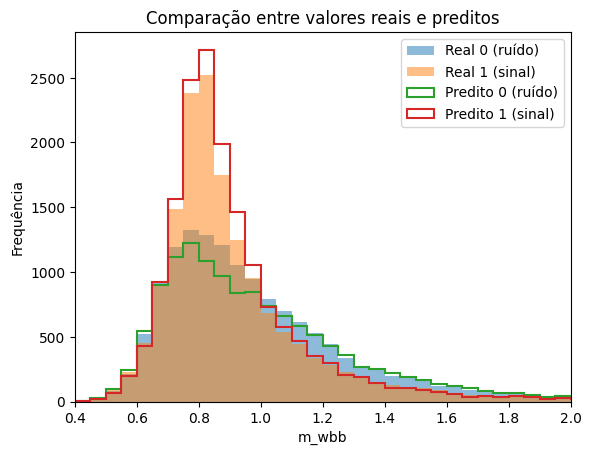

In [187]:
# y_pred foi construido com shape degenerada,
# por isso devo garantir que seja 1D
y_pred = y_pred.reshape(-1)  

# separo entre sinal e ruido
m_wwbb_pred_0 = m_wwbb_teste[y_pred == 0]
m_wwbb_pred_1 = m_wwbb_teste[y_pred == 1]
m_wwbb_true_0 = m_wwbb_teste[y_teste == 0]
m_wwbb_true_1 = m_wwbb_teste[y_teste == 1]

# plot
bins = np.arange(0.4, 2.1, 0.05)
plt.hist(m_wwbb_true_0, bins=bins, alpha=0.5, label='Real 0 (ruído)')
plt.hist(m_wwbb_true_1, bins=bins, alpha=0.5, label='Real 1 (sinal)')
plt.hist(m_wwbb_pred_0, bins=bins, histtype='step', linewidth=1.5, label='Predito 0 (ruído)')
plt.hist(m_wwbb_pred_1, bins=bins, histtype='step', linewidth=1.5, label='Predito 1 (sinal)')
plt.xlabel('m_wbb')
plt.xlim(0.4, 2)
plt.ylabel('Frequência')
plt.legend()
plt.title('Comparação entre valores reais e preditos');

Este gráfico oferece uma conclusão um pouco melhor sobre o desempenho da rede, na medida em que, apesar das métricas não tão boas, os histogramas real vs predito são razoavelmente próximos. Vale notar que são mais próximos que o histograma da rede rasa usando as features high-level (NN7) apresentado na figura 8.b do paper.

Assim, concluo que foi possível chegar a uma classificação razoável, especialmente quando se considera a baixíssima complexidade da rede. Ressalto que, nos testes que realizei localmente, uma rede idêntica à "DN 6 layers" do paper levou 1 minuto para rodar 10 épocas, e demorou centenas de épocas até disparar o early stop, enquanto a rede mais simples implementada acima demorou 3 minutos para rodar todas as épocas.